<br>

# 👩🏻‍⚕️ **MEDICAL INSURANCE** 👩🏻‍⚕️

**LINEAL REGRESSION PROJECT**

## **INDEX**
- **STEP 1: PROBLEM DEFINITION AND DATA COLLECTION**
- **STEP 2: DATA EXPLORATION AND CLEANING**
- **STEP 3: UNIVARIATE VARIABLE ANALYSIS**
- **STEP 4: MULTIVARIATE VARIABLE ANALYSIS**
- **STEP 5: FEATURE ENGINEERING**
- **STEP 6: FEATURE SELECTION**
- **STEP 7: MACHINE LEARNING**
- **STEP 8: CONCLUSIONS**


<br>

### **STEP 1: PROBLEM DEFINITION AND DATA COLLECTION**

- 1.1. Problem Definition
- 1.2. Library Importing
- 1.3. Data Collection

<br>

**1.1 PROBLEM DEFINITION**

**Customer Profile Analysis:**

- Which age groups are more likely to face higher health insurance costs?
- Is there a correlation between body mass index (BMI) and insurance premiums?
- Does smoking significantly increase insurance costs compared to non-smokers?

**Demographic and Health Behavior Analysis:**

- Are there gender-based differences in insurance costs?
- Does the number of dependents impact insurance costs?
- Do people in specific regions tend to have higher average insurance costs?

**Behavioral and Lifestyle Factors:**

- What is the financial impact of smoking on insurance premiums?
- How does body mass index (BMI) influence average insurance costs?

**Temporal and Regional Analysis:**

- Are there regional variations in insurance costs?
- Is there a trend of increasing insurance costs over time due to medical inflation?

**Economic Factors and Insurance Costs:**

- How do regional average health expenses affect insurance premiums?
- Is there a link between economic factors (like medical inflation) and customer preference for comprehensive insurance?

**Insurance Premium and Customer Adherence:**

- What are the primary factors contributing to higher health insurance costs?
- How do age, BMI, smoking status, and number of dependents influence these costs?
- How do these costs impact health insurance adherence?
- Are customers with higher premiums more likely to discontinue the service?

<br>

**1.2. LIBRARY IMPORTING**

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random
import json
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from pickle import dump
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

<br>

**1.3. DATA COLLECTION**

In [3]:
pd.options.display.max_columns=None
insurance = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Export DataFrame 'insurance' to a local CSV file

insurance.to_csv("../data/raw/medical_insurance_data.csv", index=False)

<br>

## **STEP 2: DATA EXPLORATION AND CLEANING**

- 2.1. Exploration: Understanding the Features
- 2.2. Identifying null values in each feature
- 2.3. Eliminating Duplicates
- 2.4. Eliminating Irrelevant Information

<br>

**2.1. EXPLORATION: UNDERSTANDING THE FEATURES**

- `age`. Age of primary beneficiary (**numeric**)
- `sex`. Gender of the primary beneficiary (**categorical**)
- `bmi`. Body mass index (**numeric**)
- `children`. Number of children/dependents covered by health insurance (**numeric**)
- `smoker`. Is the person a smoker? (**categorical**)
- `region`. Beneficiary's residential area in the U.S.: northeast, southeast, southwest, northwest (**categorical**)
- `charges`. Health insurance premium (**numerical**)

<br>

In [5]:
# Dataset Dimensions
print("\033[1mDATASET DIMENSIONS:\033[0m")
print(insurance.shape)

DATASET DIMENSIONS:
(1338, 7)


In [6]:
# Dataset informations and Data Types.  

print("\n\033[1mDATA TYPES:\033[0m\n")
print(insurance.info())


DATA TYPES:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [7]:
# Obtaining the description of the dataset's statistics:
insurance.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [8]:
# Analyze the types of information we have
print("Data types present in the dataset:", insurance.dtypes.unique())

# Identify numerical and categorical variables
numerical_vars = insurance.select_dtypes(include=['float', 'int']).columns
categorical_vars = insurance.select_dtypes(include=['O']).columns

# Count the number of numerical and categorical variables
num_numerical_vars = len(numerical_vars)
num_categorical_vars = len(categorical_vars)

print(f"Number of categorical variables: {num_categorical_vars}")
print("Categorical variables:", list(categorical_vars))
print('\n')
print(f"Number of numerical variables: {num_numerical_vars}")
print("Numerical variables:", list(numerical_vars))

Data types present in the dataset: [dtype('int64') dtype('O') dtype('float64')]
Number of categorical variables: 3
Categorical variables: ['sex', 'smoker', 'region']


Number of numerical variables: 4
Numerical variables: ['age', 'bmi', 'children', 'charges']


**OBSERVATIONS:**

- This DataFame is composed by 1338 rows and 7 columns (variables).
- There are no variables with null values.
- The data has:

**3 CATEGORICAL VARIABLES:** `sex`, `smoker`, `region`

**4 NUMERICAL VARIABLES:**  `age`, `bmi`, `children`, `charges`

<br>

**2.2. IDENTIFYING NULL VALUES IN EACH FEATURE**

In [9]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**OBSERVATIONS:** None of the variables have any null values.

<br>

**2.3. ELIMINATING DUPLICATES**

In [10]:
# ELIMINATE DUPLICATES

initial_row_count = insurance.shape[0]

num_duplicates = insurance.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    insurance = insurance.drop_duplicates()
    print(f"Duplicate rows have been removed. Row count reduced from {initial_row_count} to {insurance.shape[0]}.")
else:
    print("No duplicate rows found.")

Number of duplicate rows: 1
Duplicate rows have been removed. Row count reduced from 1338 to 1337.


<br>

**2.4. ELIMINATING IRRELEVANT INFORMATION**

All features will be preserved. During the preliminary stages of constructing a classification model to predict long-term deposit subscription, it was decided to preserve all features as their individual contributions to the model's performance remained unknown.

<br>

## **STEP 3: ANALYSIS OF UNIVARIATE VARIABLES**

- 3.1. Analysis of categorical variables
- 3.2. Analysis of numerical variables

**3.1. ANALYSIS OF CATEGORICAL VARIABLES**


In [11]:
# Split the original dataframe by numerical and categorical values

num = ['int64', 'float64']
cat = ['O']

insurance_numerical = insurance.select_dtypes(num)
insurance_categorical = insurance.select_dtypes(cat)

In [12]:
insurance_categorical.head(3)

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast


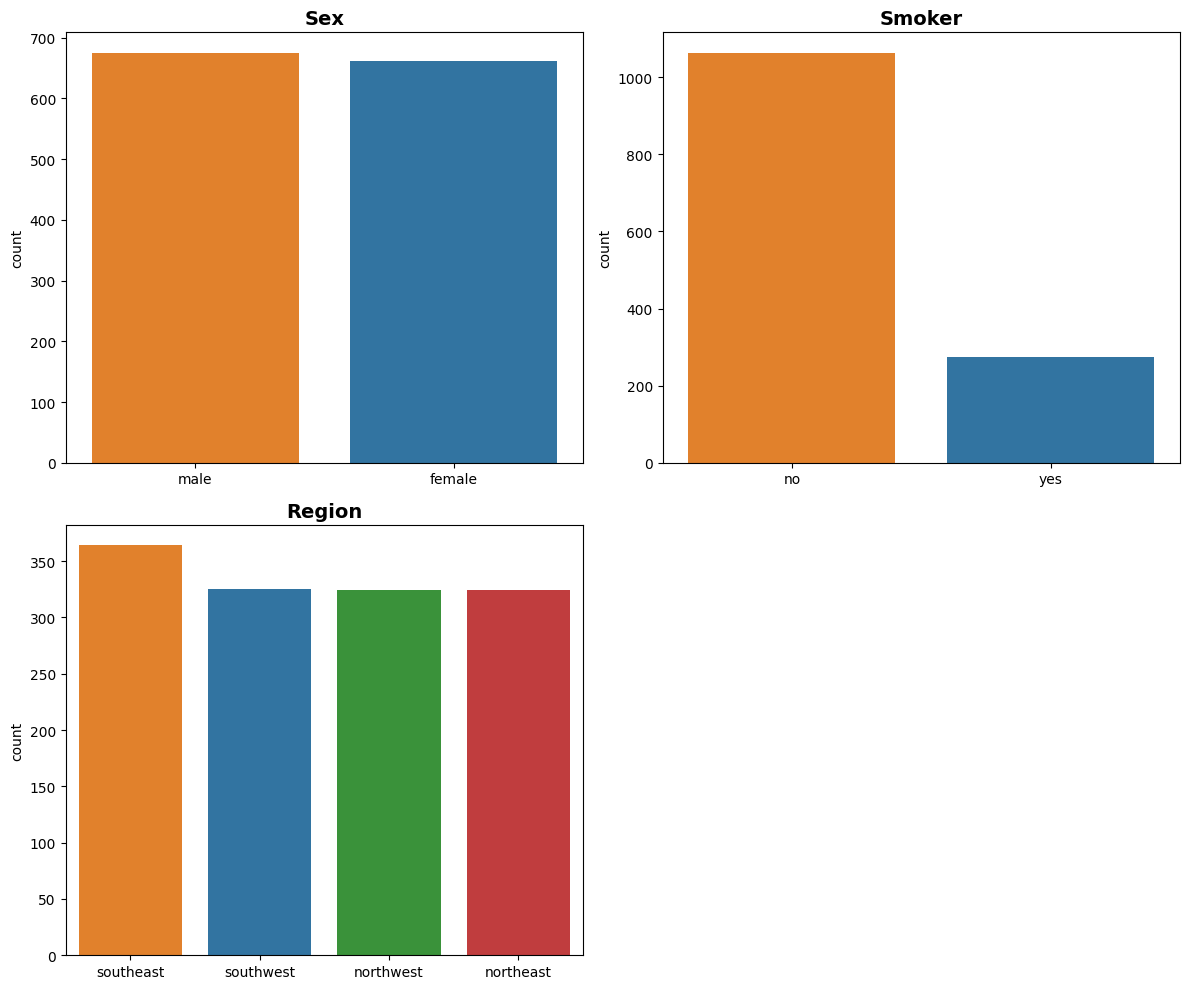

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Plot for 'sex'
sns.countplot(ax=ax[0, 0], data=insurance_categorical, x='sex', order=insurance_categorical['sex'].value_counts().index, hue='sex')
ax[0, 0].set_title("Sex", fontsize=14, fontweight='bold')
ax[0, 0].set_xlabel(None)  

# Plot for 'smoker'
sns.countplot(ax=ax[0, 1], data=insurance_categorical, x='smoker', order=insurance_categorical['smoker'].value_counts().index, hue='smoker')
ax[0, 1].set_title("Smoker", fontsize=14, fontweight='bold')
ax[0, 1].set_xlabel(None)  

# Plot for 'region'
sns.countplot(ax=ax[1, 0], data=insurance_categorical, x='region', order=insurance_categorical['region'].value_counts().index, hue='region')
ax[1, 0].set_title("Region", fontsize=14, fontweight='bold')
ax[1, 0].set_xlabel(None)  

# Remove the empty subplot (bottom-right)
fig.delaxes(ax[1, 1])


plt.tight_layout()
plt.show()

**OBSERVATIONS:**

`Sex`
The numbers of men and women are pretty close, but there are slightly more men. It's almost a 50/50 split, but there are a few more men than women.

`Smoker`
Most individuals in the dataset are non-smokers, while a considerable portion are smokers. This disparity could be significant for the analysis, as smoking status is a key factor in insurance pricing. Smokers typically face higher premiums due to increased health risks associated with smoking.

`Region`
The four regions (southeast, southwest, northwest, northeast) are well-represented in the data, with a slight overrepresentation of the southeast region.


**3.2. ANALYSIS OF NUMERICAL VARIABLES**

In [14]:
insurance_numerical.head(3)

,age,bmi,children,charges
0,19,27.90,0,16884.9240
1,18,33.77,1,1725.5523
2,28,33.00,3,4449.4620


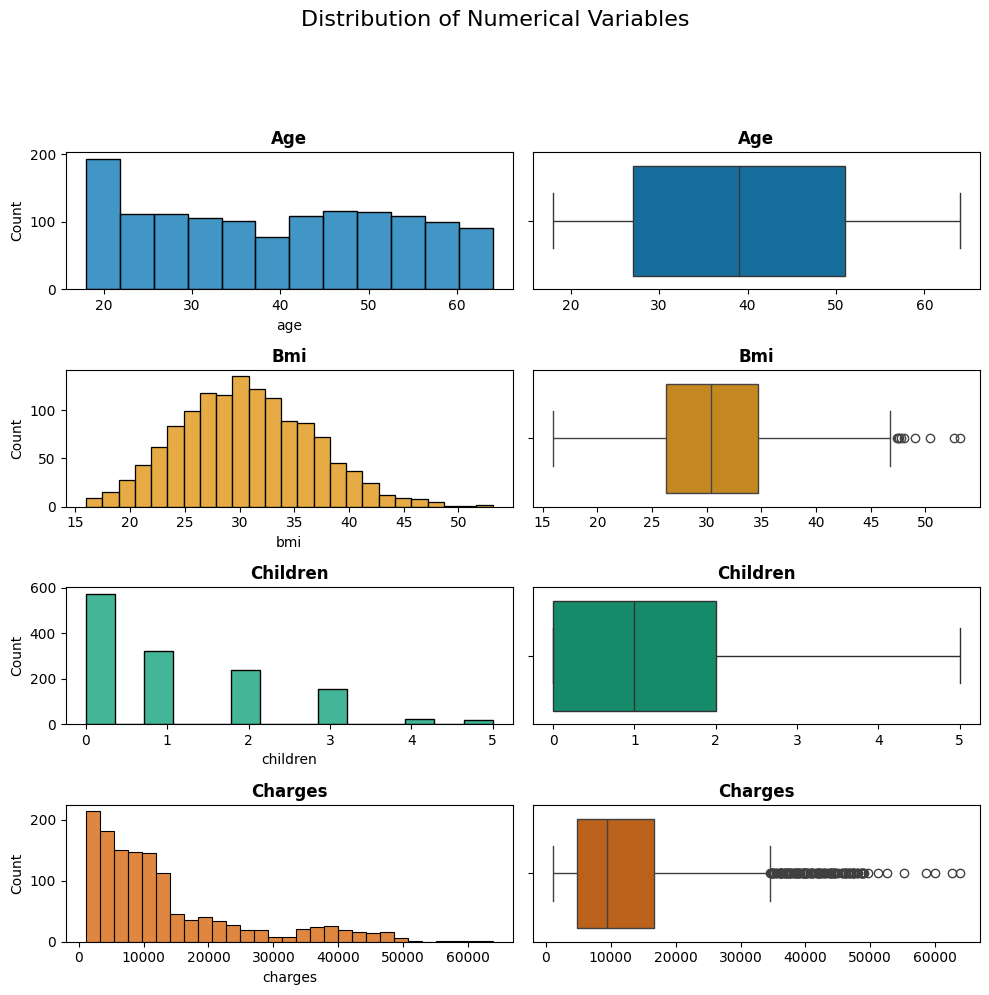

In [15]:
def plot_numerical_variables(insurance_numerical, hue=None): 
    """
    Plots histograms and boxplots for all numeric variables in `insurance_numerical`
    using a 2-column layout with a fixed color palette for visual consistency.

    Parameters:
    - insurance_numerical: DataFrame containing only the numerical columns to analyze.
    - hue: Column name for hue (optional). If provided, it must exist in `insurance_numerical`.
    """
    # Get all numerical columns from `insurance_numerical`
    numerical_columns = insurance_numerical.columns.tolist()

    # Calculate the required number of rows
    num_vars = len(numerical_columns)
    num_rows = (num_vars + 1) // 2 


    fig, axes = plt.subplots(num_rows * 2, 2, figsize=(10, num_rows * 5))
    plt.suptitle('Distribution of Numerical Variables', fontsize=16, y=1.02)

    axes = axes.flatten()
    
    palette = sns.color_palette("colorblind", num_vars)

    # Loop to create histograms and boxplots for each numerical variable
    for i, col in enumerate(numerical_columns):
        color = palette[i % len(palette)]  
        
        # Histogram with or without hue
        sns.histplot(ax=axes[i * 2], data=insurance_numerical, x=col, hue=hue if hue in insurance_numerical.columns else None, color=color)
        axes[i * 2].set_title(col.capitalize(), fontweight='bold')  
        
        # Boxplot (without hue)
        sns.boxplot(ax=axes[i * 2 + 1], data=insurance_numerical, x=col, color=color)
        axes[i * 2 + 1].set_title(col.capitalize(), fontweight='bold')  
        axes[i * 2 + 1].set(xlabel=None) 

   
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    
plot_numerical_variables(insurance_numerical, hue=None)

`age`:
- The age distribution is relatively uniform between 20 and 60 years old, with a slight bias towards younger individuals.

- The boxplot indicates that most ages are symmetrically distributed, without any significant outliers.

`bmi` (Body Mass Index):

- BMI is approximately normally distributed, centered around 30, with most values falling between 20 and 40.

- The boxplot reveals a few outliers above 40, suggesting that some individuals have higher BMIs, which may influence health insurance costs.

`children` (Number of Children/Dependents):

- The distribution of children is heavily concentrated at zero and one dependent, with very few families having four or five children/dependents.

- The boxplot reflects this concentration, with values predominantly between zero and two children and no significant outliers.

`charges` (Health Insurance Cost):
- The distribution of insurance charges is right-skewed, with most costs below 20,000 but a long tail extending up to 60,000.

- The boxplot confirms this asymmetry, showing several outliers, which indicate higher insurance premiums, potentially associated with specific risk factors, such as smoking or underlying health conditions.




**Outliers:**
- The distributions for BMI and insurance charges reveal the presence of outliers, suggesting that certain groups of customers may possess specific characteristics or risk factors that significantly influence their insurance costs.

<br>

## **STEP 4: MULTIVARIATE VARIABLE ANALYSIS**

- 4.1. Encoding Categorical Values and saving JSON files.
- 4.2. Categorical - Categorical Analysis.
- 4.3. Numerical - Numerical Analysis.
- 4.4. Categorical-Numerical Correlation Matrix

Multivariate analysis also allows combining the class with several predictors at the same time to enrich the analysis.

<br>

**4.1. ENCODING CATEGORICAL VALUES AND SAVING JSON FILES**

In [16]:
# Create a copy of the original DataFrame to apply the encoding replacements
insurance_n = insurance.copy()

In [17]:
os.makedirs('../data/interim/enc/', exist_ok=True)

# Loop over each column to create and save the encoder as a JSON file
for col in insurance_categorical.columns:
    # Get unique values and create an encoding dictionary
    unique_values = list(insurance_categorical[col].unique())
    encoder_dict = dict(zip(unique_values, range(len(unique_values))))
    
    # Save the encoding dictionary as a JSON file
    with open(f'../data/interim/enc/{col}_n.json', 'w') as f:
        json.dump(encoder_dict, f)

# Load and apply the encoding from JSON files
for col in insurance_categorical.columns:
    # Load the encoder dictionary from the saved JSON file
    encoder_dict = json.load(open(f'../data/interim/enc/{col}_n.json'))
    
    # Apply the mapping to the column in the DataFrame
    insurance_n[col] = insurance_n[col].map(encoder_dict)

In [18]:
insurance_n.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


**4.2. CATEGORICAL-CATEGORICAL ANALYSIS**

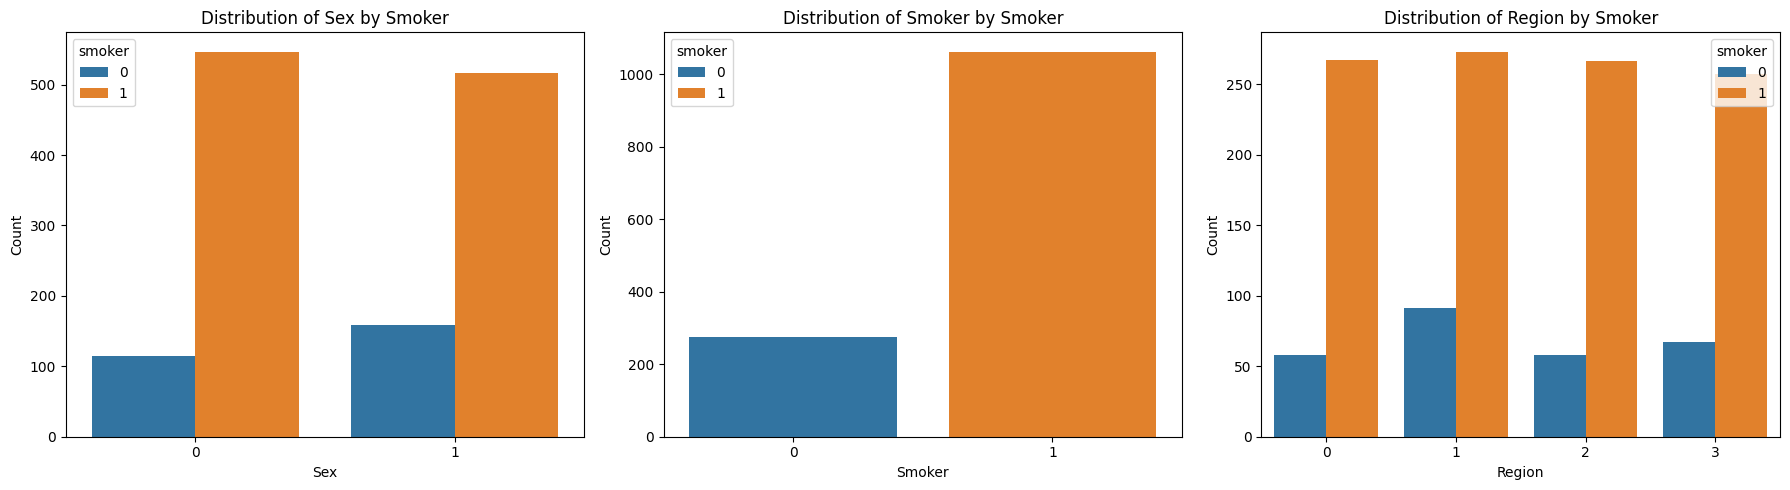

In [19]:
categorical_vars = ['sex', 'smoker', 'region']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Loop for each categorical variable
for i, var in enumerate(categorical_vars):
    sns.countplot(data=insurance_n, x=var, hue='smoker', ax=axes[i])
    axes[i].set_title(f'Distribution of {var.capitalize()} by Smoker')
    axes[i].set_xlabel(var.capitalize())
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

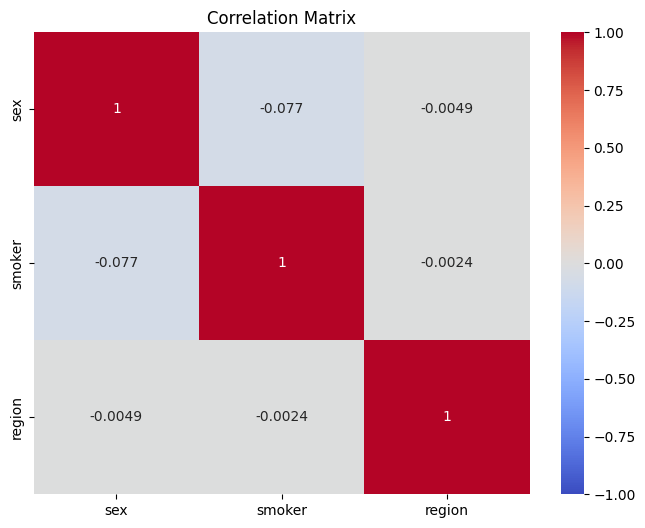

In [20]:
# Calculate correlation matrix
correlation_matrix = insurance_n[categorical_vars].corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

**OBSERVATIONS:**

`sex` and `smoker`:
- Correlation: -0.077
- The negative correlation is minimal, suggesting almost no linear relationship between gender and smoking habits. The data implies that being a smoker does not significantly depend on gender.

`sex` and `region`:
- Correlation: -0.0049
- This correlation is close to zero, indicating no linear association between an individual's gender and their geographical location. Gender distribution appears uniform across different regions.

`smoker` and `region`:
- Correlation: -0.0024
- The correlation is effectively zero, indicating no relationship between an individual's smoking status and their region. Smoking habits appear independent of location.

**General Insights:**

- None of the categorical variables show significant correlations. This indicates independence among these variables.
- The absence of strong correlations suggests that other factors might be more influential in determining the premium cost. It would be prudent to focus on numerical variables or interaction effects for more predictive insights.

<br>

**4.3. NUMERICAL-NUMERICAL ANALYSIS**

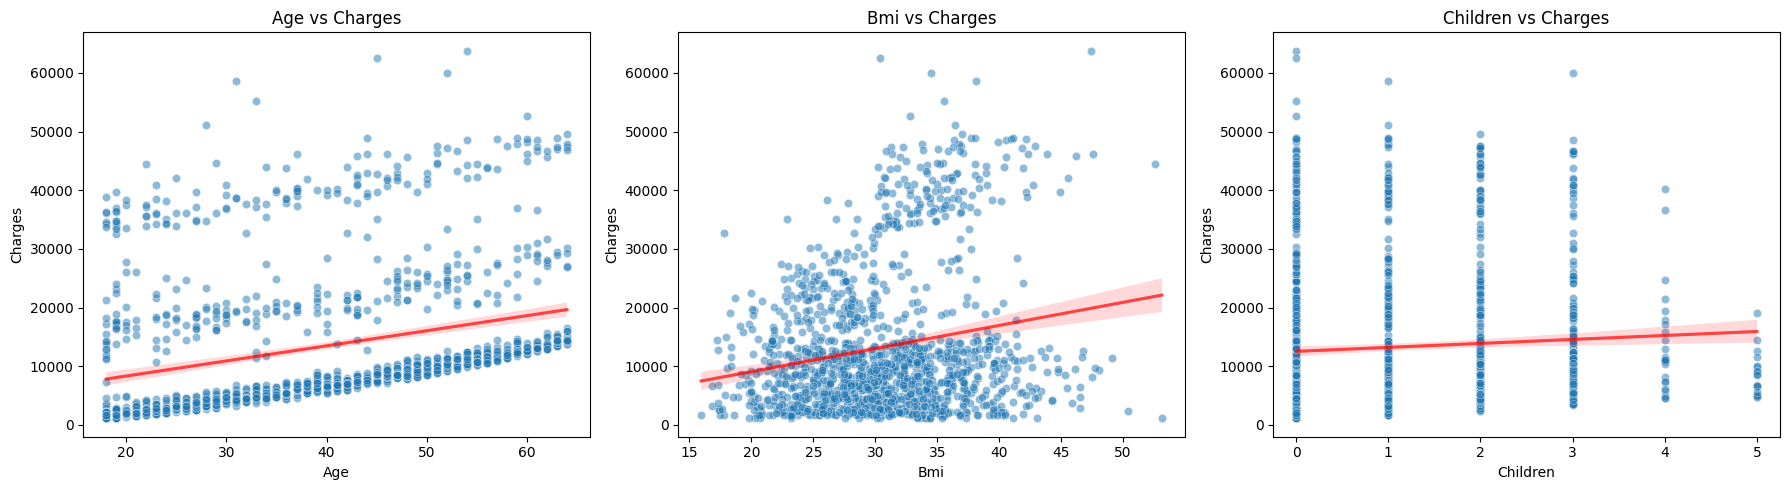

In [21]:
numerical_vars = ['age', 'bmi', 'children', 'charges']

# Scatter plots between 'charges' and the other numerical variables with regression line
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, var in enumerate(numerical_vars[:-1]):  # Excludes 'charges' in the last position
    # Scatter plot
    sns.scatterplot(data=insurance_n, x=var, y='charges', ax=axes[i], alpha=0.5)
    
    # Regression line
    sns.regplot(data=insurance_n, x=var, y='charges', ax=axes[i], scatter=False, color='red', line_kws={"alpha": 0.7})
    
    axes[i].set_title(f'{var.capitalize()} vs Charges')
    axes[i].set_xlabel(var.capitalize())
    axes[i].set_ylabel('Charges')

plt.tight_layout()
plt.show()

`age` and `charges`

**Correlation:**

- There is a positive linear correlation between Age and Charges. Older customers tend to have higher premiums.

**Observations:**

- The regression line shows a steady upward trend, indicating that medical costs increase as customers age.
- The scatter plot reveals significant dispersion in charges, especially for older individuals, suggesting variability in how age impacts premium costs.

**Interpretation:**

- Older individuals are likely to require more medical care, which drives up the cost of their insurance. However, other factors, such as smoking or pre-existing health conditions, might amplify this trend.

**Conclusion:**

- Age is a significant predictor of `charges`. It should be included as a primary feature in the predictive model.

<br>

`bmi` and `charges`

**Correlation:**

- There is a weak positive correlation between BMI and Charges. As BMI increases, insurance costs rise slightly.

**Observations:**

- While there is a visible upward trend in the regression line, the dispersion of data points indicates a weak linear relationship.
- A cluster of high Charges values for individuals with higher BMI suggests that certain outliers (e.g., individuals with obesity-related health risks) may disproportionately affect this variable.

**Interpretation:**

- Elevated `BMI` levels are associated with increased risk for health complications, which might partially explain the higher insurance costs for some individuals.
- However, this variable alone does not strongly determine the premiums, suggesting the need for additional factors such as smoking status or age.

**Conclusion:**

- While not the strongest predictor, BMI might interact with other variables (e.g., Smoker) to affect Charges.

<br>

`children` and `charges`

**Correlation:**

- There is a very weak positive correlation between the number of children and Charges. Having more children slightly increases insurance costs.

**Observations:**

- The regression line shows a minimal upward slope, indicating that the number of children has a marginal effect on premiums.
- The scatter plot demonstrates significant overlap in Charges across different numbers of children, suggesting weak influence.

**Interpretation:**

- The slight increase in Charges might reflect family plans or policies that cover multiple dependents, though the direct impact of Children appears limited.

**Conclusion:**

- Children is a weak predictor of Charges and should be treated as a secondary feature in the analysis.

**General Insights**

- Focus on `age` as it exhibits the strongest correlation with `charges`.
- Include `BMI` in the model but investigate its interaction with other variables, such as smoking status or region.
- Treat `children` as a secondary feature due to its weak individual correlation.

<br>

**4.4 CATEGORICAL-NUMERICAL CORRELATION MATRIX**

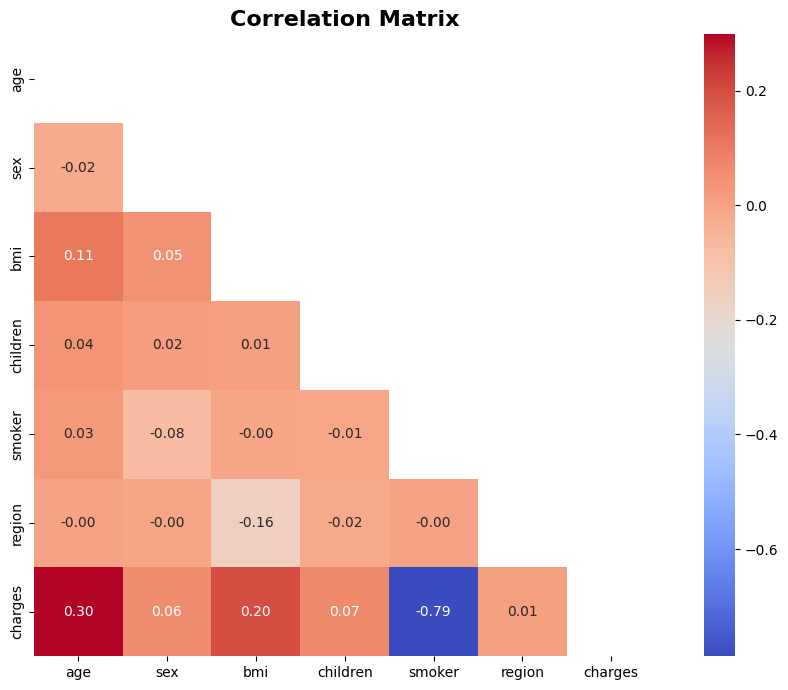

In [22]:
# Calculate the full correlation matrix
corr_matrix = insurance_n.corr()

plt.figure(figsize=(10, 7))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=np.triu(corr_matrix), square=True)

plt.title("Correlation Matrix", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

**Understanding the Data** The goal is to understand how these variables influence the premium cost.

- The correlation matrix visualizes the relationships between various variables, including:

- **Categorical**: `sex`, `smoker`, `region`
- **Numerical**: `age`, `bmi`, `children`, `charges` (premium cost)

**Correlation Matrix:** 

- This matrix provides a quantitative measure of the linear relationship between two variables. 
- A value closer to 1 indicates a strong positive correlation, -1 indicates a strong negative correlation, and 0 indicates no linear correlation.

**Observations:**

- **Smoker and Charges:** The **strongest correlation** is observed between 'smoker' and 'charges'. This is a strong negative correlation (-0.79), indicating that individuals who smoke are likely to have significantly higher insurance premiums.

- **Age and Charges:** There is a **moderate positive correlation** between 'age' and 'charges'. This suggests that as age increases, so does the insurance premium, which is generally expected due to higher healthcare costs associated with older age groups.

- **BMI and Charges:** There is a **moderate positive correlation** between 'bmi' (Body Mass Index) and 'charges'. This implies that individuals with higher BMIs tend to have higher insurance premiums, possibly due to increased health risks associated with obesity.

- **Children and Charges:** While there is a **slight positive correlation** between 'children' and 'charges', it's **relatively weak**. This suggests that having children might slightly increase the premium, but it's not a very strong determinant.

**Sex and Charges:** There seems to be a very **weak correlation** between 'sex' and 'charges', indicating that gender has a negligible impact on the premium in this dataset.

- **Region and Charges:** The correlation between 'region' and 'charges' is also very **weak**, suggesting that the geographical location of the individual has little influence on the premium.

### **INSIGHTS AND IMPLICATIONS:**

- **Smoking is a major factor:** The strong negative correlation between '`smoker`' and '`charges`' highlights the significant impact of smoking on insurance costs. Insurance companies often charge higher premiums for smokers due to the increased health risks associated with smoking.
- **Age and BMI are important:** Both `age` and `BMI` have a noticeable impact on premiums, reflecting the general trend of higher healthcare costs for older individuals and those with higher BMIs.

- **Other factors:** While children and region have a minor influence, they are not as significant as smoking, age, and BMI in determining premiums.

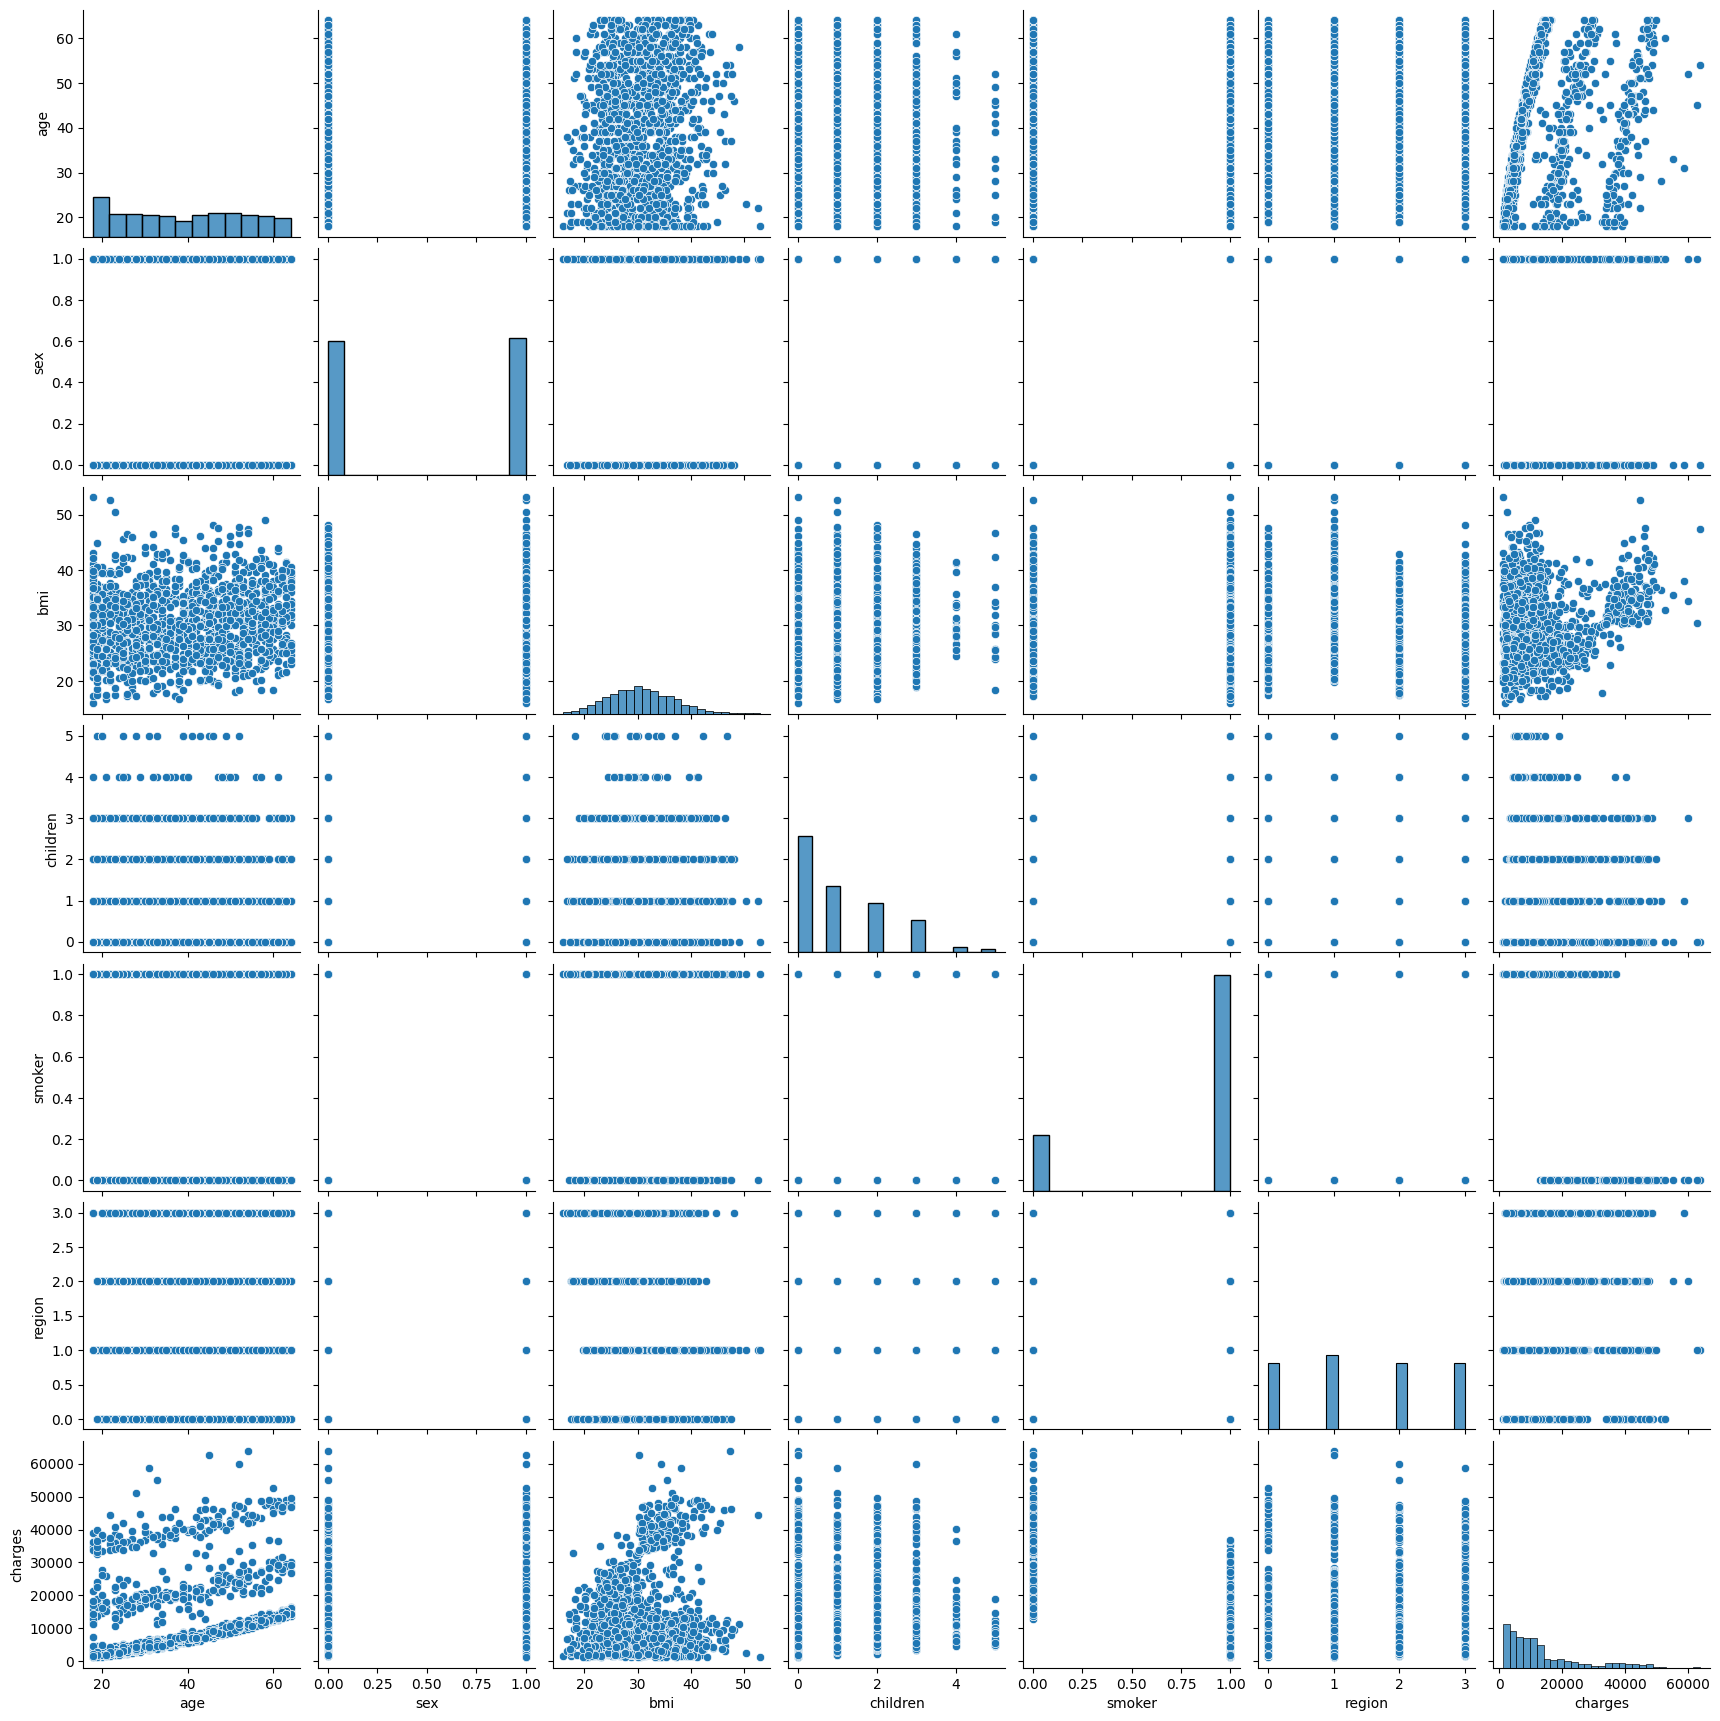

In [23]:
# Create pairplot for all numerical variables in the dataset
sns.pairplot(data=insurance_n)
plt.show()

<br>

# **STEP 5: FEATURE ENGINEERING**

- 5.1. Outlier analysis
- 5.2. Missing Values
- 5.3. Split TRAIN/TEST of both Dataframes
- 5.3. Normalization
- 5.4. min-MAX Scaling

<br>

**5.1. OUTLIER ANALYSIS**

In [24]:
# Descriptive statistics for the DataFrame `insurance_n`
insurance_stats = insurance_n.describe().round(2)
insurance_stats

,age,sex,bmi,children,smoker,region,charges
count,1337.00,1337.0,1337.00,1337.00,1337.0,1337.00,1337.00
mean,39.22,0.5,30.66,1.10,0.8,1.48,13279.12
std,14.04,0.5,6.10,1.21,0.4,1.11,12110.36
min,18.00,0.0,15.96,0.00,0.0,0.00,1121.87
25%,27.00,0.0,26.29,0.00,1.0,1.00,4746.34
50%,39.00,1.0,30.40,1.00,1.0,1.00,9386.16
75%,51.00,1.0,34.70,2.00,1.0,2.00,16657.72
max,64.00,1.0,53.13,5.00,1.0,3.00,63770.43


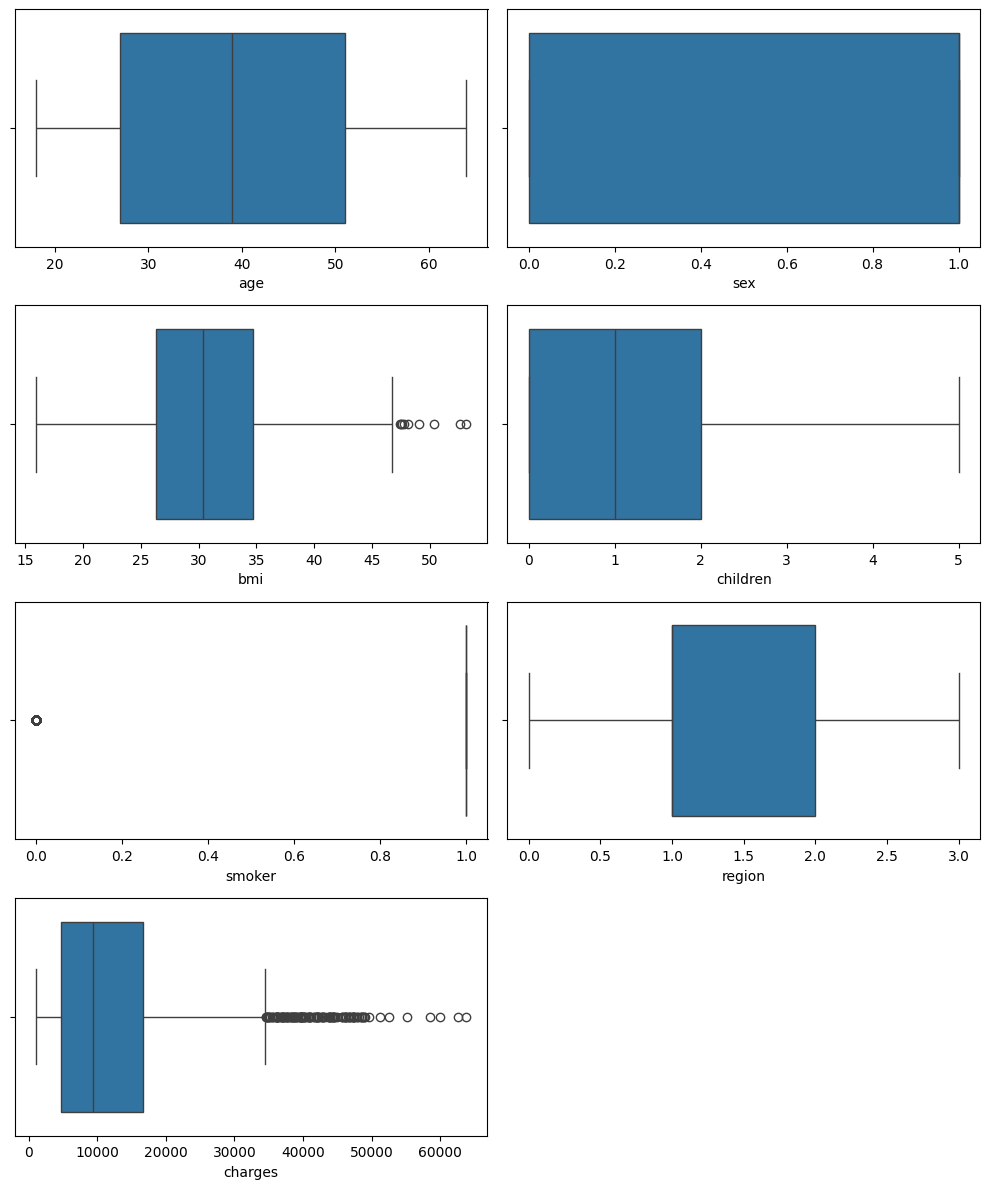

In [25]:
fig, ax = plt.subplots(4, 2, figsize=(10, 12))

sns.boxplot(ax = ax[0,0], data = insurance_n, x='age')
sns.boxplot(ax = ax[0,1], data = insurance_n, x='sex')

sns.boxplot(ax = ax[1,0], data = insurance_n, x='bmi')
sns.boxplot(ax = ax[1,1], data = insurance_n, x='children')

sns.boxplot(ax = ax[2,0], data = insurance_n, x='smoker')
sns.boxplot(ax = ax[2,1], data = insurance_n, x='region')

sns.boxplot(ax = ax[3,0], data = insurance_n, x='charges')

fig.delaxes(ax[3, 1])

plt.tight_layout()
plt.show()

Outlier limits will be determined for the bmi variable. We'll use these limits to create a new dataset without outliers (insurance_without_outliers). This dataset will be compared to the original dataset (insurance_with_outliers) to assess the impact of outliers on model performance.

In [26]:
insurance_with_outliers = insurance_n.copy()
insurance_without_outliers = insurance_n.copy()

In [27]:
def remove_outliers(x, feature_name, allow_neg=True):
    q1, q3 = x.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_lim = q3 + (iqr*1.5)
    lower_lim = q1 - (iqr*1.5) if allow_neg else max(0, q1 - (iqr * 1.5))

    x = x.apply(lambda x: upper_lim if (x > upper_lim) else (lower_lim if (x < lower_lim) else x))

    filename = f'../data/interim/outliers_lims_{feature_name}.json'
    with open(filename, 'w') as f:
        json.dump({'upper_lim': upper_lim, 'lower_lim': lower_lim}, f)

    return x

In [28]:
# List of continuous features for outlier adjustment without negative lower limits
features_no_negative_outliers = ['bmi']

# Loop through each feature, adjusting outliers
for feature in features_no_negative_outliers:
    print(f"Processing outliers for feature: {feature}")
    insurance_without_outliers[feature] = remove_outliers(insurance_without_outliers[feature], feature_name=feature, allow_neg=False)

Processing outliers for feature: bmi


In [29]:
insurance_with_outliers.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


In [30]:
insurance_without_outliers.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


<br>

**5.2. MISSING VALUES**

In [31]:
insurance_with_outliers.isna().sum()[insurance_with_outliers.isna().sum()>0]

Series([], dtype: int64)

- The dataset contains no missing values for the treatment variable.

<br>

**5.3. SPLIT TRAIN/TEST OF BOTH DATAFRAME**

In [32]:
# Function to split data into training and testing sets
def split(target, insurance, test_size=0.2, random_state=123):
    """
    Splits a DataFrame into training and testing sets.

    Parameters:
    - target: str, the name of the target column to be predicted
    - insurance: DataFrame, the complete DataFrame to split
    - test_size: float, proportion of the data to allocate to the test set (default is 0.2)
    - random_state: int, sets the seed for reproducibility (default is 123)

    Returns:
    - X_train, X_test: DataFrames containing the training and testing features
    - y_train, y_test: Series containing the training and testing target values
    """
    
    # Separate the features (X) from the target (y)
    X = insurance.drop(columns=target)
    y = insurance[target]               

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    return X_train, X_test, y_train, y_test
# Split original dataframe 
X_train_with_outliers, X_test_with_outliers, y_train, y_test = split('charges', insurance_with_outliers)
X_train_without_outliers, X_test_without_outliers, _, _ = split('charges', insurance_without_outliers)

X_train_with_outliers.to_csv('../data/processed/X_train_with_outliers.csv', index=False)
X_test_with_outliers.to_csv('../data/processed/X_test_with_outliers.csv', index=False)
X_train_without_outliers.to_csv('../data/processed/X_train_without_outliers.csv', index=False)
X_test_without_outliers.to_csv('../data/processed/X_test_without_outliers.csv', index=False)

y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

In [33]:
# View train and test data for verification
X_train_with_outliers.head()

,age,sex,bmi,children,smoker,region
1185,45,1,23.560,2,1,3
680,21,0,17.400,1,1,0
206,59,1,26.400,0,1,1
628,58,1,38.000,0,1,0
708,31,0,30.495,3,1,3


In [34]:
# Displays the first five rows of the `X_train_without_outliers` DataFrame for a quick preview of the data.
X_train_without_outliers.head()

,age,sex,bmi,children,smoker,region
1185,45,1,23.560,2,1,3
680,21,0,17.400,1,1,0
206,59,1,26.400,0,1,1
628,58,1,38.000,0,1,0
708,31,0,30.495,3,1,3


In [35]:
y_test

28       2775.19215
547     11538.42100
857     15817.98570
1336     2007.94500
221     10564.88450
           ...     
186      3981.97680
867     11576.13000
67       6389.37785
631      1977.81500
1225     4795.65680
Name: charges, Length: 268, dtype: float64

<br>

**5.3. NORMALIZATION**

In [36]:
def normalize_and_save(X_train, X_test, filename):
    """
    Normalizes the data using StandardScaler and saves the scaler for future use.

    Parameters:
    - X_train: DataFrame with the training data
    - X_test: DataFrame with the testing data
    - filename: string, the name of the file to save the scaler

    Returns:
    - X_train_norm: DataFrame with the normalized training data
    - X_test_norm: DataFrame with the normalized testing data
    """

    
    scaler = StandardScaler()
    scaler.fit(X_train)  

    # Apply normalization to training and testing data
    X_train_norm = scaler.transform(X_train)
    X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)

    X_test_norm = scaler.transform(X_test)
    X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)

    # Save the scaler for future use
    joblib.dump(scaler, f'../data/processed/{filename}.sav')

    return X_train_norm, X_test_norm

# Application of the function to normalize data with and without outliers
X_train_with_outliers_norm, X_test_with_outliers_norm = normalize_and_save(
    X_train_with_outliers, X_test_with_outliers, 'normalized_with_outliers'
)

X_train_without_outliers_norm, X_test_without_outliers_norm = normalize_and_save(
    X_train_without_outliers, X_test_without_outliers, 'normalized_without_outliers'
)

<br>

**5.4. min-MAX SCALING** 

In [37]:
def minmax_and_save(X_train, X_test, filename):
    """
    Applies Min-Max Scaling to the data and saves the scaler for future use.

    Parameters:
    - X_train: DataFrame with the training data
    - X_test: DataFrame with the testing data
    - filename: string, the name of the file to save the scaler

    Returns:
    - X_train_minmax: DataFrame with the scaled training data
    - X_test_minmax: DataFrame with the scaled testing data
    """

    scaler = MinMaxScaler()
    scaler.fit(X_train)  # Fit the scaler with training data

    # Apply Min-Max Scaling to training and testing data
    X_train_minmax = scaler.transform(X_train)
    X_train_minmax = pd.DataFrame(X_train_minmax, index=X_train.index, columns=X_train.columns)

    X_test_minmax = scaler.transform(X_test)
    X_test_minmax = pd.DataFrame(X_test_minmax, index=X_test.index, columns=X_test.columns)

    # Save the scaler for future use
    joblib.dump(scaler, f'../data/processed/{filename}.sav')

    return X_train_minmax, X_test_minmax

# Applying the function to scale data with and without outliers
X_train_with_outliers_minmax, X_test_with_outliers_minmax = minmax_and_save(
    X_train_with_outliers, X_test_with_outliers, 'minmax_with_outliers'
)

X_train_without_outliers_minmax, X_test_without_outliers_minmax = minmax_and_save(
    X_train_without_outliers, X_test_without_outliers, 'minmax_without_outliers'
)

<br>

# **STEP 6: FEATURE SELECTION**

- 6.1. Applying the filter to the normalized and minmax scaled data frames
- 6.2. Saving the CSV files

<br>

In [38]:
def kselection_and_save(X_train, X_test, y_train, k, filename):
    """
    Applies feature selection using SelectKBest and saves the model for future use.

    Parameters:
    - X_train: DataFrame with training data
    - X_test: DataFrame with testing data
    - y_train: Series with target training data
    - k: Number of features to select
    - filename: String, the name of the file to save the selection model

    Returns:
    - X_train_sel: DataFrame with selected features from training data
    - X_test_sel: DataFrame with selected features from testing data
    """
    # Handle missing values
    X_train = X_train.fillna(0)
    X_test = X_test.fillna(0)
    y_train = y_train.dropna()

    # Remove constant columns
    X_train = X_train.loc[:, X_train.var() != 0]
    X_test = X_test.loc[:, X_train.columns]  # Match columns with X_train

    # Create the feature selection model
    selection_model = SelectKBest(f_classif, k=k)
    selection_model.fit(X_train, y_train)

    # Select columns based on the model
    selected_columns = X_train.columns[selection_model.get_support()]

    # Transform training and testing data to keep only selected features
    X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=selected_columns, index=X_train.index)
    X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=selected_columns, index=X_test.index)

    # Save the selection model
    joblib.dump(selection_model, f'../data/processed/{filename}.sav')

    return X_train_sel, X_test_sel


**6.1. APPLYING THE FILTER TO THE NORMALIZED AN min-MAX SCALED DATAFRAME**

In [39]:
# Applying the filter to normalized and Min-Max Scaling datasets

# Normalized data
X_train_with_outliers_norm_sel = X_train_with_outliers_norm[X_train_with_outliers_sel.columns]
X_train_without_outliers_norm_sel = X_train_without_outliers_norm[X_train_without_outliers_sel.columns]

X_test_with_outliers_norm_sel = X_test_with_outliers_norm[X_test_with_outliers_sel.columns]
X_test_without_outliers_norm_sel = X_test_without_outliers_norm[X_test_without_outliers_sel.columns]

# Scaled data with Min-Max
X_train_with_outliers_minmax_sel = X_train_with_outliers_minmax[X_train_with_outliers_sel.columns]
X_train_without_outliers_minmax_sel = X_train_without_outliers_minmax[X_train_without_outliers_sel.columns]

X_test_with_outliers_minmax_sel = X_test_with_outliers_minmax[X_test_with_outliers_sel.columns]
X_test_without_outliers_minmax_sel = X_test_without_outliers_minmax[X_test_without_outliers_sel.columns]

NameError: name 'X_train_with_outliers_sel' is not defined

**6.2. SAVING THE CSV FILES**

In [ ]:
insurances_train = {
    'X_train_with_outliers_sel': X_train_with_outliers_sel,
    'X_train_without_outliers_sel': X_train_without_outliers_sel,
    'X_train_with_outliers_norm_sel': X_train_with_outliers_norm_sel,
    'X_train_without_outliers_norm_sel': X_train_without_outliers_norm_sel,
    'X_train_with_outliers_minmax_sel': X_train_with_outliers_minmax_sel,
    'X_train_without_outliers_minmax_sel': X_train_without_outliers_minmax_sel 
}

insurances_test = {
    'X_test_with_outliers_sel': X_test_with_outliers_sel,
    'X_test_without_outliers_sel': X_test_without_outliers_sel,
    'X_test_with_outliers_norm_sel': X_test_with_outliers_norm_sel,
    'X_test_without_outliers_norm_sel': X_test_without_outliers_norm_sel,
    'X_test_with_outliers_minmax_sel': X_test_with_outliers_minmax_sel,
    'X_test_without_outliers_minmax_sel': X_test_without_outliers_minmax_sel    
}

for name, insurance in insurances_train.items():
    insurance.to_csv(f"../data/processed/{name}.csv", index=False)

for name, insurance in insurances_test.items(): 
    insurance.to_csv(f'../data/processed/{name}.csv', index=False)

# **STEP 7: MACHINE LEARNING**

- 7.1. Choosing the best Dataset

<br>

**7.1. CHOOSING THE BEST DATASET**


- Wich is the best Dataset?



In [ ]:
train, test = [], []

for name, insurance in insurances_train.items():
    train.append(insurance)
for name, insurance in insurances_test.items():
    test.append(insurance)

In [ ]:
results = []


for index in range(len(train)):
    model = LinearRegression()
    train_insurance = train[index]
    model.fit(train_insurance, y_train) 
    y_test_pred = model.predict(test[index]) 
    
    
    results.append(
        {
            'index': index,
            'insurance_train': list(insurances_train.keys())[index],  
            'Coef': model.coef_,
            'MAE': mean_absolute_error(y_test, y_test_pred).round(3),
            'RMSE': round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 3), 
            "R2_score": round(r2_score(y_test, y_test_pred), 3)            
        }
    )

results

[{'index': 0,
  'insurance_train': 'X_train_with_outliers_sel',
  'Coef': array([   258.63442857,   -185.98692562,    321.56240415,    498.21466835,
         -23356.13969946,    351.93742911]),
  'MAE': np.float64(3885.655),
  'RMSE': np.float64(5560.283),
  'R2_score': 0.8},
 {'index': 1,
  'insurance_train': 'X_train_without_outliers_sel',
  'Coef': array([   258.15828897,   -179.48548027,    324.92226339,    496.26178404,
         -23358.13378602,    353.26710699]),
  'MAE': np.float64(3890.36),
  'RMSE': np.float64(5558.7),
  'R2_score': 0.8},
 {'index': 2,
  'insurance_train': 'X_train_with_outliers_norm_sel',
  'Coef': array([ 3616.63627214,   -92.99016702,  1964.98097187,   601.59893854,
         -9458.39445526,   384.38908326]),
  'MAE': np.float64(3885.655),
  'RMSE': np.float64(5560.283),
  'R2_score': 0.8},
 {'index': 3,
  'insurance_train': 'X_train_without_outliers_norm_sel',
  'Coef': array([ 3609.97813402,   -89.73955955,  1969.36643617,   599.24081221,
         -9459.20

In [ ]:
sorted_results = sorted(results, key=lambda x: x['RMSE'])
sorted_results

[{'index': 1,
  'insurance_train': 'X_train_without_outliers_sel',
  'Coef': array([   258.15828897,   -179.48548027,    324.92226339,    496.26178404,
         -23358.13378602,    353.26710699]),
  'MAE': np.float64(3890.36),
  'RMSE': np.float64(5558.7),
  'R2_score': 0.8},
 {'index': 3,
  'insurance_train': 'X_train_without_outliers_norm_sel',
  'Coef': array([ 3609.97813402,   -89.73955955,  1969.36643617,   599.24081221,
         -9459.20198842,   385.84136887]),
  'MAE': np.float64(3890.36),
  'RMSE': np.float64(5558.7),
  'R2_score': 0.8},
 {'index': 5,
  'insurance_train': 'X_train_without_outliers_minmax_sel',
  'Coef': array([ 11875.28129249,   -179.48548027,  10187.93756856,   2481.30892022,
         -23358.13378602,   1059.80132097]),
  'MAE': np.float64(3890.36),
  'RMSE': np.float64(5558.7),
  'R2_score': 0.8},
 {'index': 0,
  'insurance_train': 'X_train_with_outliers_sel',
  'Coef': array([   258.63442857,   -185.98692562,    321.56240415,    498.21466835,
         -2335

In [ ]:
sorted_results = sorted(results, key=lambda x: x['RMSE'])
sorted_results

[{'index': 1,
  'insurance_train': 'X_train_without_outliers_sel',
  'Coef': array([   258.15828897,   -179.48548027,    324.92226339,    496.26178404,
         -23358.13378602,    353.26710699]),
  'MAE': np.float64(3890.36),
  'RMSE': np.float64(5558.7),
  'R2_score': 0.8},
 {'index': 3,
  'insurance_train': 'X_train_without_outliers_norm_sel',
  'Coef': array([ 3609.97813402,   -89.73955955,  1969.36643617,   599.24081221,
         -9459.20198842,   385.84136887]),
  'MAE': np.float64(3890.36),
  'RMSE': np.float64(5558.7),
  'R2_score': 0.8},
 {'index': 5,
  'insurance_train': 'X_train_without_outliers_minmax_sel',
  'Coef': array([ 11875.28129249,   -179.48548027,  10187.93756856,   2481.30892022,
         -23358.13378602,   1059.80132097]),
  'MAE': np.float64(3890.36),
  'RMSE': np.float64(5558.7),
  'R2_score': 0.8},
 {'index': 0,
  'insurance_train': 'X_train_with_outliers_sel',
  'Coef': array([   258.63442857,   -185.98692562,    321.56240415,    498.21466835,
         -2335

In [ ]:
print(f"Mean squared error: {mean_squared_error(y_test, y_test_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_test_pred)}")

Mean squared error: 30899149.417920277
Coefficient of determination: 0.8000886516527745


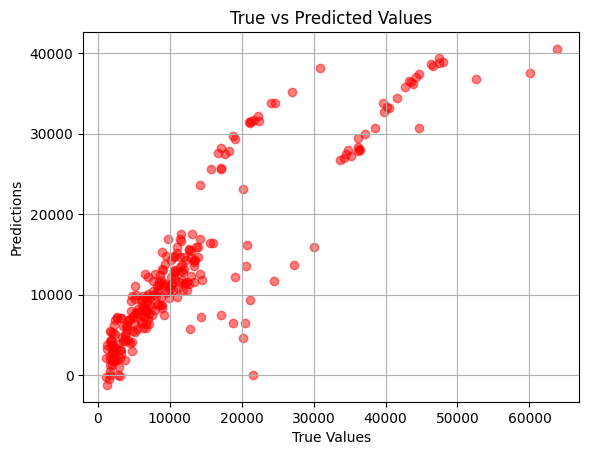

In [ ]:
plt.scatter(y_test, y_test_pred, alpha=0.5, color='red')  
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted Values")
plt.grid()
plt.show()

<br>

# **STEP 8: CONCLUSIONS** 

### **STATEMENTS**

Linear regression is an excellent starting point for projects such as predicting health insurance costs due to its simplicity and ability to identify clear trends between independent variables (like `age`, `BMI`, number of `children`, etc.) and the dependent variable (**insurance cost**).

Linear regression generates coefficients indicating the magnitude and direction of each variable's impact on insurance cost. This allows answering questions like:

- How much does the cost increase for each additional year of age?
- How much does BMI influence the cost?

This level of interpretability is especially useful for insurance actuaries, who need to justify their rate-setting decisions.

In health insurance, factors such as age, BMI, and health status often have near-linear relationships with costs. For example:

- `Age`: Older individuals tend to require more medical care, increasing costs.
- `BMI`: A higher BMI can be associated with conditions like diabetes or cardiovascular disease.

While these relationships may not be perfectly linear, linear regression can capture the general trend. If it produces a good fit to the data, more complex models may not be necessary, saving time and resources.

# **CONCLUSIONS**

**Model Evaluation Metrics**
The following metrics were obtained to evaluate the model:

- `R-squared: 0.8`, indicating that the model explains 80% of the variability in health insurance costs.
- `Root Mean Squared Error (RMSE)`: 5558.7.
- `Mean Absolute Error (MAE)`: 3890.36.

These metrics reflect that while the model is capable of capturing most of the general trends, there are significant errors, particularly given that most costs are below 20,000.

**Interpretation of Results and Challenges**

- The interpretation of the metrics reveals that, although the model is useful for gaining a general understanding of how variables affect cost, there are limitations:

- **High RMSE and MAE**: Indicate that the model is not sufficiently precise for individual predictions, possibly due to the presence of outliers or non-linear relationships.

**Potential for model improvement:** More complex models, such as decision trees or neural networks, could be explored to capture non-linear relationships between variables.

**Recommendations**
To improve the model's accuracy and applicability in real-world scenarios:

- **Outlier analysis:** Identify and handle extreme data points that may distort the results.
- **Incorporation of more advanced models:** Consider non-linear approaches, such as polynomial regression or machine learning models.
- **Evaluation of new variables:** Include additional factors related to medical costs, such as overall health status or medical history.

**Findings**
Linear regression provides a solid foundation for predicting health insurance costs, being an interpretable and functional tool in linear scenarios. However, the predictive errors indicate that it could benefit from adjustments or the incorporation of more complex models. This combination would allow for more accurate prediction and more robust support for actuarial decisions and pricing strategies.



<br>

<br>